### General imports

In [1]:
%matplotlib notebook

import os
import itertools

import numpy as np
import cv2

from matplotlib import pyplot as plt

In [2]:
from PIL import Image

### Auxiliary functions

In [3]:
from skimage.color import rgb2gray
def load_images(names, render=True):
    """Loads images from files and renders them, if necessary

    Args:
        names: list of image files to load
        render: flag that defines if image should be rendered

    Returns:
        Dictionary with loaded images
    """

    # TODO: Develop function to load images from files
    dictionary = {}
    for img_name in names:
        dictionary[img_name] = rgb2gray(cv2.imread(img_name))
        
    render_images(dictionary)

In [4]:
def render_images(images):
    """Renders images
    
    Args:
        images: dictionary with images
    """
    
    # TODO: Develop function to render images. Make sure to have a descriptive caption for each image
    for image_name, image in images.items():
        plt.figure()
        plt.imshow(image)
        plt.title(image_name)
        plt.show()
    pass

In [5]:
def find_line_plane_intersection(points_of_line, points_of_plane):
    """Finds coordinate of line-plane intersection point

    Args:
        points_of_line: container with 2 points that defines line in 3D space
        points_of_plane: container with 3 points that defines plane in 3D space

    Returns:
        Point of intersection
    """
    
    #TODO: Develop function to find coordinates of line-plane intersection point
    x_1 = points_of_line[0][0]
    y_1 = points_of_line[0][1]
    z_1 = points_of_line[0][2]
    x_2 = points_of_line[1][0]
    y_2 = points_of_line[1][1]
    z_2 = points_of_line[1][2]
    
    xp_1 = points_of_plane[0][0]
    yp_1 = points_of_plane[0][1]
    zp_1 = points_of_plane[0][2]
    xp_2 = points_of_plane[1][0]
    yp_2 = points_of_plane[1][1]
    zp_2 = points_of_plane[1][2]
    xp_3 = points_of_plane[2][0]
    yp_3 = points_of_plane[2][1]
    zp_3 = points_of_plane[2][2]
    
    M = [xp_1, yp_1, zp_1]
    v = [x_1, y_1, z_1]
    
    a = [xp_2-xp_1, yp_2-yp_1, zp_2-zp_1]
    b = [xp_3-xp_1, yp_3-yp_1, zp_3-zp_1]
    
    k_line = [x_2-x_1, y_2-y_1, z_2-z_1]
    n = [a[1]*b[2]-a[2]*b[1],
        a[2]*b[0]-a[0]*b[2],
        a[0]*b[1]-a[1]*b[0]]
    
    num_sum = 0.0
    den_sum = 0.0
    for i in range(3):
        num_sum += (v[i]-M[i])*n[i]
        den_sum += k[i]*n[i]
    
    t = num_sum/den_sum
    result = []
    for i in range(3):
        result.append(k_line[i]*t+v[i])
    
    return result  # or np.zeros((2, 1))

In [6]:
def homogeneous_matrix(rotation_matrix, translation_vector):
    """Calculates homogenous matrix from rotation matrix and translation vector

    Args:
        rotation_matrix: rotation matrix (3x3)
        translation_vector: translation vector (3x1)

    Returns:
        Homogeneous matrix (4x4)
    
    Notes:
        - This function is OPTIONAL.
        - You can use rotation matrix and translation vector for transitions between different coordinate systems.
        - Homogeneous matrix is merely a more proficient way for computing transitions.
    """
    
    #OPTIONAL
    #TODO: Develop function to calculate homogenous matrix for transitions between different coordinate systems
    tmp = rotation_matrix
    result = np.zeros((4, 4))
    for i in range(3):
        for j in range(3):
            result[i][j] = round(tmp[i][j],1)
        result[i][3] = translation_vector[i]
    
    result[3][3] = 1
    
    return result
        
        
rotation_matrix = np.load('setup-0/camera-rotation-matrix.npy')
translation_vector = np.load('setup-0/camera-translation-vector.npy')
np.around(homogeneous_matrix(rotation_matrix, translation_vector),0)

array([[  1.,  -0.,   0.,  22.],
       [  0.,  -1.,  -0.,  -9.],
       [  0.,   0.,  -1., 601.],
       [  0.,   0.,   0.,   1.]])

In [7]:
def inverse_homogeneous_matrix(homogeneous_matrix):
    """Calculates inverse matrix of given homogeneous matrix

    Args:
        homogeneous_matrix: matrix to be inversed (4x4)

    Returns:
        Inverse homogeneous matrix (4x4)
    
    Notes:
        - This function is OPTIONAL.
        - You can use rotation matrix and translation vector for transitions between different coordinate systems.
        - Homogeneous matrix is merely a more proficient way for computing transitions.
    """
    
    #OPTIONAL
    #TODO:  Develop function to calculate inverse homogenous matrix for transitions between different coordinate systems
    
    return np.linalg.inv(homogeneous_matrix)
inv = inverse_homogeneous_matrix(homogeneous_matrix(rotation_matrix, translation_vector))

### Preparation of patterns and acquisition of dataset

In [8]:
def generate_slset(arg1, arg2, argn, shape, path):
    """Generates set of structured light images at specified path to project on object for 3D reconstruction.

    Args:
        arg1..n: all necessary arguments that you need
        shape: resolution of generated image
        path: path to folder where generated images should be saved
        
    Notes:
        - Resolution should correspond to resolution of projector to avoid potential image interpolation issues
        - For current projector it should be 1280 x 800 points
    """
    
    # TODO: Develop function to generate set of structured light images

    pass


In [9]:
# TODO: Generate a set of images with structured illumination patterns

In [10]:
# TODO: Load and render portion of generated images
# Total: 4 images

In [11]:
# TODO: Load captured images


<IPython.core.display.Javascript object>


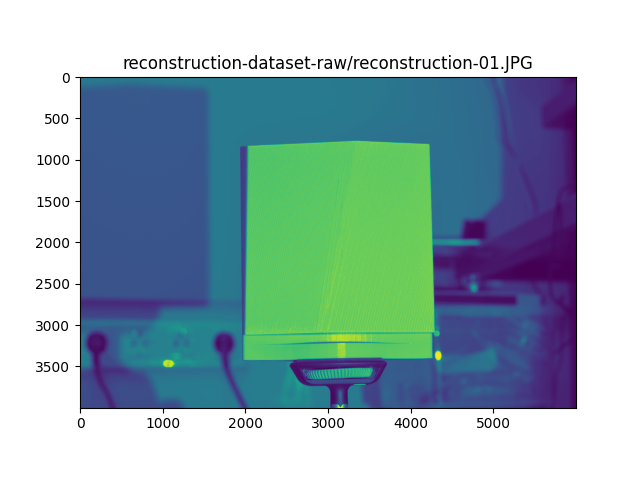

<IPython.core.display.Javascript object>


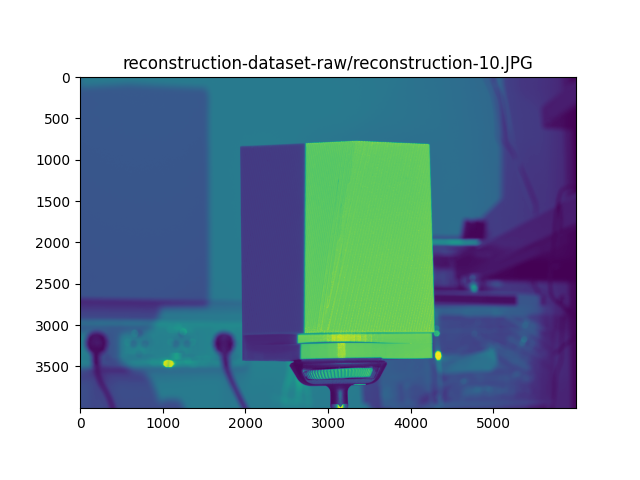

<IPython.core.display.Javascript object>


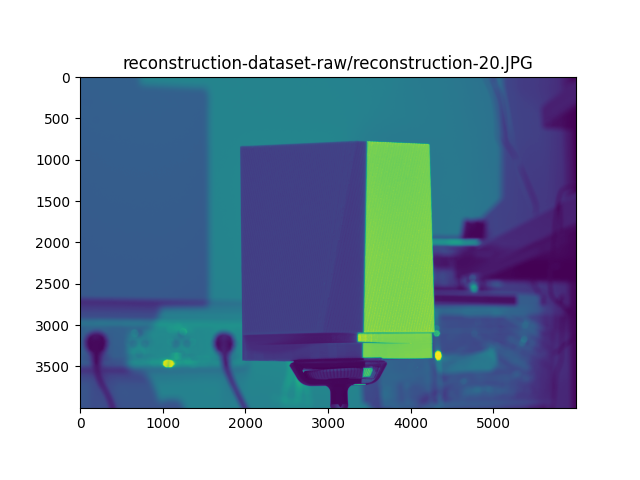

<IPython.core.display.Javascript object>


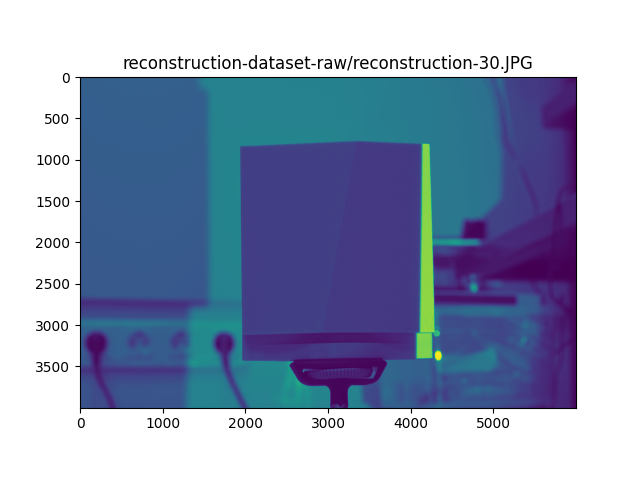

In [12]:
# TODO: Render portion of captured photos
# Total: 4 images
imgs = ['reconstruction-dataset-raw/reconstruction-01.JPG',
       'reconstruction-dataset-raw/reconstruction-10.JPG',
       'reconstruction-dataset-raw/reconstruction-20.JPG',
       'reconstruction-dataset-raw/reconstruction-30.JPG',]
load_images(imgs)

In [13]:
imgs = []
for i in os.listdir('reconstruction-dataset-raw/'):
    imgs.append(i)
for i in range(len(imgs)):
    imgs[i] = 'reconstruction-dataset-raw/'+imgs[i]
imgs

['reconstruction-dataset-raw/reconstruction-32.JPG',
 'reconstruction-dataset-raw/reconstruction-05.JPG',
 'reconstruction-dataset-raw/reconstruction-13.JPG',
 'reconstruction-dataset-raw/reconstruction-07.JPG',
 'reconstruction-dataset-raw/reconstruction-17.JPG',
 'reconstruction-dataset-raw/reconstruction-25.JPG',
 'reconstruction-dataset-raw/reconstruction-21.JPG',
 'reconstruction-dataset-raw/reconstruction-08.JPG',
 'reconstruction-dataset-raw/reconstruction-30.JPG',
 'reconstruction-dataset-raw/reconstruction-11.JPG',
 'reconstruction-dataset-raw/reconstruction-27.JPG',
 'reconstruction-dataset-raw/reconstruction-24.JPG',
 'reconstruction-dataset-raw/reconstruction-20.JPG',
 'reconstruction-dataset-raw/reconstruction-19.JPG',
 'reconstruction-dataset-raw/reconstruction-15.JPG',
 'reconstruction-dataset-raw/reconstruction-29.JPG',
 'reconstruction-dataset-raw/reconstruction-03.JPG',
 'reconstruction-dataset-raw/reconstruction-04.JPG',
 'reconstruction-dataset-raw/reconstruction-28

### 3D reconstruction

In [14]:
def detect_ridge(name, n = 20):
    """Detects camera sensor coordinates of luminance ridge on the image with projected structured light pattern
       (N points per image).

    Args:
        name: name of the processed image
        arg1..n: all necessary arguments that you need

    Returns:
        Array of 2D points that belong to luminance ridge
    """
    
    #TODO: Develop function to find coordinates of points that belong to luminance ridge
    #      on captured image introduced due to projected structured light pattern on object
    ridge = []
    
    img = cv2.imread(name, 0)
    ridges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    ridges_blur = cv2.GaussianBlur(ridges, (31, 31), 5)
    y_bot = 1000
    y_top = 3000
    x_bot = 2000
    x_top = 4000
    
    step = int((y_top-y_bot)/n)
    for i in range(n):
        tmp = np.where(ridges_blur[y_bot+step*i, :] == np.amax(ridges_blur[y_bot+step*i, :]))[0][0]
        ridge.append([tmp,y_bot+step*i])
    
    
    return ridge

In [15]:
def get_projector_panel_points(imgs, n=20):
    """Returns projector panel coordinates of points that will be used for 3D reconstruction.
       Should match generated set of images (M upper and M lower points)

    Args:
        arg1..n: all necessary arguments that you need
        shape: resolution of generated image

    Returns:
        Array of 2D points required for 3D reconstruction
    """

    #TODO: Develop function to find coordinates of points on projector panel
    top_list = []
    bot_list = []
    for i in range(len(imgs)):
        tmp = detect_ridge(str(imgs[i]), n)
        top_list.append(tmp[-1])
        top_list.append(tmp[0])
    
    
    return top_list
get_projector_panel_points(imgs)

[[4245, 2900],
 [4235, 1000],
 [2318, 2900],
 [2338, 1000],
 [2945, 2900],
 [2955, 1000],
 [2476, 2900],
 [2494, 1000],
 [3223, 2900],
 [3260, 1000],
 [3775, 2900],
 [3804, 1000],
 [3502, 2900],
 [3535, 1000],
 [2556, 2900],
 [2570, 1000],
 [4114, 2900],
 [4136, 1000],
 [2790, 2900],
 [2803, 1000],
 [3911, 2900],
 [3937, 1000],
 [3708, 2900],
 [3738, 1000],
 [3433, 2900],
 [3467, 1000],
 [3364, 2900],
 [3399, 1000],
 [3088, 2900],
 [3107, 1000],
 [4045, 2900],
 [4069, 1000],
 [2158, 2900],
 [2180, 1000],
 [2237, 2900],
 [2260, 1000],
 [3978, 2900],
 [4003, 1000],
 [1999, 2900],
 [2023, 1000],
 [2398, 2900],
 [2416, 1000],
 [2712, 2900],
 [2724, 1000],
 [2867, 2900],
 [2878, 1000],
 [2633, 2900],
 [2649, 1000],
 [3642, 2900],
 [3672, 1000],
 [4181, 2900],
 [4203, 1000],
 [3155, 2900],
 [3184, 1000],
 [3020, 2900],
 [3031, 1000],
 [3842, 2900],
 [3870, 1000],
 [3294, 2900],
 [3331, 1000],
 [2078, 2900],
 [2106, 1000],
 [3573, 2900],
 [3604, 1000]]

In [16]:
def load_calibration(path='setup-0'):
    """Loads calibration data for camera and projector from files stored in specified folder

    Args:
        path: path to where calibration files are stored

    Returns:
        2 tuple with camera and projector calibration data (in order):
            - intrinsic matrix
            - distortion vector
            - average rotation matrix
            - average translation vector
        Rotation matrix and translation vector are used for transition from world into camera/projector coordinates
    """
    
    # This function is ready to use.
    # DO NOT CHANGE IT UNLESS IT IS REALLY NECESSARY.
    
    names = ['-'.join(x) for x in itertools.product(['camera', 'projector'],
                                                    ['intrinsic-matrix.npy',
                                                     'distortion-vector.npy',
                                                     'rotation-matrix.npy',
                                                     'translation-vector.npy'])]

    return ([np.load(os.path.join(path, x)) for x in names[:4]],
            [np.load(os.path.join(path, x)) for x in names[4:]])

*`TODO`*: Describe the purpose of each component of the calibration data.
We will use callibratsion data to undistort the images from distorted process in camera. Intrinsic matrix can tell about focal length and optical centers of the camera. Distortion vector can tell distortion coefficients that we can ust to calculate distorted x and y for radial distortion or tangential distortion. Rotation matrix and translation vector are the main components to use as $[R|t]$ (homogeneous matrix) that can be use to calculate matrix inverse  and multiply with the points in camera. So, we will get the points in the real word.

In [18]:
top = get_projector_panel_points(imgs)
projector_intrinsic_matrix = np.load('setup-0/projector-intrinsic-matrix.npy')
projector_distortion_vector = np.load('setup-0/projector-distortion-vector.npy')
dst_top = cv2.undistortPoints(np.array(top,  dtype=np.float32), projector_intrinsic_matrix, projector_distortion_vector)
dst_top = dst_top.reshape((-1,2))

In [19]:
tmp = np.zeros((64,4))
for i in range(64):
    for j in range (2):
        tmp[i][j] = dst_top[i][j]
        tmp[i][j+2]=1
tmp

array([[0.00941083, 0.00577226, 1.        , 1.        ],
       [0.02462445, 0.00236204, 1.        , 1.        ],
       [0.05465302, 0.07148445, 1.        , 1.        ],
       [0.5326798 , 0.10576514, 1.        , 1.        ],
       [0.03261165, 0.03116506, 1.        , 1.        ],
       [0.20014416, 0.02933972, 1.        , 1.        ],
       [0.04871913, 0.05830653, 1.        , 1.        ],
       [0.42797381, 0.07795852, 1.        , 1.        ],
       [0.02510829, 0.02143473, 1.        , 1.        ],
       [0.1154236 , 0.01500156, 1.        , 1.        ],
       [0.01472908, 0.01037698, 1.        , 1.        ],
       [0.04643879, 0.00503139, 1.        , 1.        ],
       [0.01918521, 0.01479467, 1.        , 1.        ],
       [0.07174691, 0.00846678, 1.        , 1.        ],
       [0.04574423, 0.05248706, 1.        , 1.        ],
       [0.38272732, 0.0670247 , 1.        , 1.        ],
       [0.01064744, 0.00677498, 1.        , 1.        ],
       [0.02830381, 0.00278791,

In [20]:
top_3d = np.delete(np.transpose(np.matmul(inv, np.transpose(tmp))),3,1)
top_3d

array([[ -78.59711563, -122.43013663,  567.18870019],
       [ -78.58211185, -122.42714611,  567.19079867],
       [ -78.55105265, -122.49420726,  567.18049236],
       [ -78.07692555, -122.53628729,  567.21948907],
       [ -78.5736521 , -122.45500401,  567.18607307],
       [ -78.4077499 , -122.4564393 ,  567.20237623],
       [ -78.55718104, -122.48141832,  567.18243731],
       [ -78.18116399, -122.50754556,  567.21481357],
       [ -78.58126933, -122.44550144,  567.18721186],
       [ -78.4919367 , -122.44103363,  567.19703868],
       [ -78.59176032, -122.43466724,  567.1883296 ],
       [ -78.56045442, -122.43012928,  567.19236778],
       [ -78.58726248, -122.4390015 ,  567.18791253],
       [ -78.5353219 , -122.43391586,  567.19412372],
       [ -78.56023845, -122.47576388,  567.18326246],
       [ -78.22618781, -122.49616643,  567.21258701],
       [ -78.5958717 , -122.4311247 ,  567.18862697],
       [ -78.57845943, -122.42762583,  567.19106797],
       [ -78.56866039, -122.

In [21]:
zer = [0,0,0,1]
inv_zer = np.delete(np.matmul(inv, zer),3)
stack = np.vstack([top_3d, inv_zer])

In [22]:
x = stack[:, 0]
y = stack[:, 1]
z = stack[:, 2]


<IPython.core.display.Javascript object>


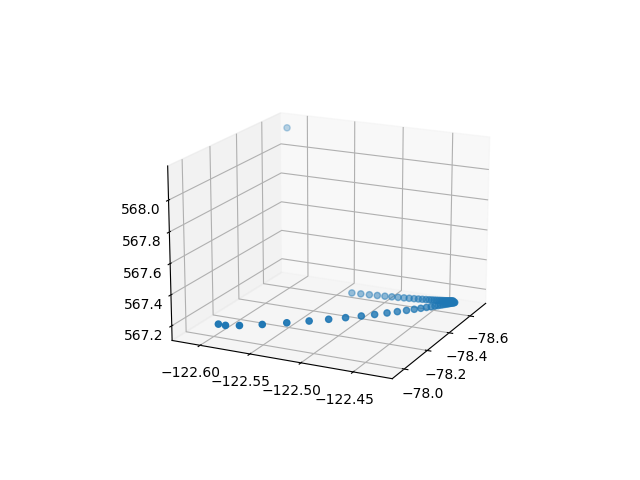

In [23]:
#TODO: Visualize resulting point cloud in 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z)

plt.show()

*`TODO`*: Describe the differences with the original object, speculating about the cause.
This picture needs to be upgraded: the real image is obtainable from taking intersections between lines and surfaces. Thank you so much!

team "easy"